Epoch     0, loss 18.215
Epoch     1, loss 8.813
Epoch     2, loss 7.942
Epoch     3, loss 7.911
Epoch     4, loss 7.670
Epoch     5, loss 7.200
Epoch     6, loss 6.869
Epoch     7, loss 6.611
Epoch     8, loss 6.399
Epoch     9, loss 6.345
Epoch    10, loss 5.628
Epoch    11, loss 5.413
Epoch    12, loss 5.190
Epoch    13, loss 5.038
Epoch    14, loss 5.020
Epoch    15, loss 5.040
Epoch    16, loss 5.006
Epoch    17, loss 4.910
Epoch    18, loss 4.814
Epoch    19, loss 4.755
Epoch    20, loss 4.646
Epoch    21, loss 4.529
Epoch    22, loss 4.467
Epoch    23, loss 4.426
Epoch    24, loss 4.413
Epoch    25, loss 4.395
Epoch    26, loss 4.362
Epoch    27, loss 4.342
Epoch    28, loss 4.297
Epoch    29, loss 4.261
Epoch    30, loss 4.221
Epoch    31, loss 4.200
Epoch    32, loss 4.183
Epoch    33, loss 4.166
Epoch    34, loss 4.145
Epoch    35, loss 4.133
Epoch    36, loss 4.114
Epoch    37, loss 4.107
Epoch    38, loss 4.095
Epoch    39, loss 4.077
Epoch    40, loss 4.058
Epoch    41, lo

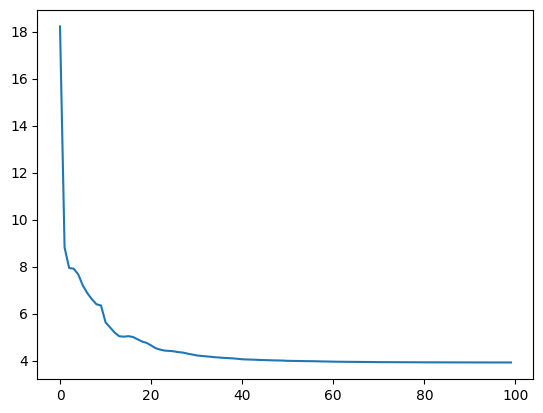

In [2]:
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import StepLR

# define input size, hidden layer size, output size
D_i, D_k, D_o = 10, 40, 5
# create model with two hidden layers
model = nn.Sequential(
    nn.Linear(D_i, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_o))

# He initialization of weights
def weights_init(layer_in):
    if isinstance(layer_in, nn.Linear):
        nn.init.kaiming_normal_(layer_in.weight)
        layer_in.bias.data.fill_(0.0)

model.apply(weights_init)

# choose least squares loss function
criterion = nn.MSELoss()
# construct SGD optimizer and initialize learning rate and momentum
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum=0.9)
# object that decreases learning rate by half every 10 epochs
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

# create 100 random data points and store in data loader class
x = torch.randn(100, D_i)
y = torch.randn(100, D_o)
data_loader = DataLoader(TensorDataset(x,y), batch_size=10, shuffle=True)

losses = []

# loop over the dataset 100 times
for epoch in range(100):
    epoch_loss = 0.0
    # loop over batches
    for i, data in enumerate(data_loader):
        # retrieve inputs and labels for this batch
        x_batch, y_batch = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward pass
        pred = model(x_batch)
        loss = criterion(pred, y_batch)
        # backward pass
        loss.backward()
        # SGD update
        optimizer.step()
        # update statistics
        epoch_loss += loss.item()
    # print error
    print(f'Epoch {epoch:5d}, loss {epoch_loss:.3f}')
    # tell scheduler to consider updating learning rate
    scheduler.step()
    
    losses.append(epoch_loss)
    
# plot loss
import matplotlib.pyplot as plt

plt.plot(losses)